<a href="https://www.kaggle.com/code/godlhardhit/disaster-tweets?scriptVersionId=215542312" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
import numpy as np 
import pandas as pd 

train = pd.read_csv("/kaggle/input/nlp-getting-started/train.csv")
test = pd.read_csv("/kaggle/input/nlp-getting-started/test.csv")

train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7613 entries, 0 to 7612
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        7613 non-null   int64 
 1   keyword   7552 non-null   object
 2   location  5080 non-null   object
 3   text      7613 non-null   object
 4   target    7613 non-null   int64 
dtypes: int64(2), object(3)
memory usage: 297.5+ KB


In [2]:
train.head()

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1


In [3]:
train.describe()

,id,target
count,7613.000000,7613.00000
mean,5441.934848,0.42966
std,3137.116090,0.49506
min,1.000000,0.00000
25%,2734.000000,0.00000
50%,5408.000000,0.00000
75%,8146.000000,1.00000
max,10873.000000,1.00000


In [4]:
print(train['keyword'].value_counts())
print("--------------------------------\n")
print(train['location'].value_counts())
print("--------------------------------\n")
print(train['text'].value_counts())
print("--------------------------------\n")

keyword
fatalities               45
deluge                   42
armageddon               42
sinking                  41
damage                   41
                         ..
forest%20fire            19
epicentre                12
threat                   11
inundation               10
radiation%20emergency     9
Name: count, Length: 221, dtype: int64
--------------------------------

location
USA                    104
New York                71
United States           50
London                  45
Canada                  29
                      ... 
MontrÌ©al, QuÌ©bec       1
Montreal                 1
ÌÏT: 6.4682,3.18287      1
Live4Heed??              1
Lincoln                  1
Name: count, Length: 3341, dtype: int64
--------------------------------

text
11-Year-Old Boy Charged With Manslaughter of Toddler: Report: An 11-year-old boy has been charged with manslaughter over the fatal sh...        10
He came to a land which was engulfed in tribal war and turned it into a land of

In [5]:
train.isnull().sum()

id             0
keyword       61
location    2533
text           0
target         0
dtype: int64

In [6]:
train_clean = train.drop('location', inplace = True, axis = 1)
train_clean = train.drop('id', inplace = True, axis = 1)
train_clean = train.dropna()
print(train_clean.info())


from sklearn.pipeline import make_pipeline
from sklearn.compose import make_column_transformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder

transformer_cat = make_pipeline(
    SimpleImputer(strategy="constant", fill_value="NA"),
    OneHotEncoder(handle_unknown='ignore'),
)

preprocessor = make_column_transformer(
    (transformer_cat, ["keyword", "text"]),
)

<class 'pandas.core.frame.DataFrame'>
Index: 7552 entries, 31 to 7582
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   keyword  7552 non-null   object
 1   text     7552 non-null   object
 2   target   7552 non-null   int64 
dtypes: int64(1), object(2)
memory usage: 236.0+ KB
None


In [7]:
X = train_clean.copy()
Y = X.pop('target')
from sklearn.model_selection import train_test_split

X_train, X_valid, y_train, y_valid = \
    train_test_split(X, Y, stratify=Y, train_size=0.75)

X_train = preprocessor.fit_transform(X_train)
X_valid = preprocessor.transform(X_valid)

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/1000
45/45 ━━━━━━━━━━━━━━━━━━━━ 4s 13ms/step - binary_accuracy: 0.5247 - loss: 0.8096 - val_binary_accuracy: 0.5726 - val_loss: 0.6844
Epoch 2/1000
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - binary_accuracy: 0.5443 - loss: 0.7398 - val_binary_accuracy: 0.5726 - val_loss: 0.6826
Epoch 3/1000
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - binary_accuracy: 0.5758 - loss: 0.6994 - val_binary_accuracy: 0.5726 - val_loss: 0.6830
Epoch 4/1000
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - binary_accuracy: 0.5910 - loss: 0.6861 - val_binary_accuracy: 0.5726 - val_loss: 0.6835
Epoch 5/1000
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - binary_accuracy: 0.6167 - loss: 0.6662 - val_binary_accuracy: 0.5726 - val_loss: 0.6841
Epoch 6/1000
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - binary_accuracy: 0.6421 - loss: 0.6465 - val_binary_accuracy: 0.5726 - val_loss: 0.6827
Epoch 7/1000
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - binary_accuracy: 0.6725 - loss: 0.6118 - val_binary_accuracy: 0.5726 - val_loss: 0.6823
Epoch

<Axes: title={'center': 'Accuracy'}>

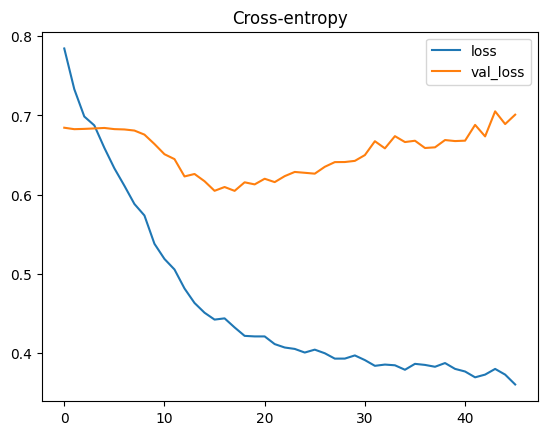

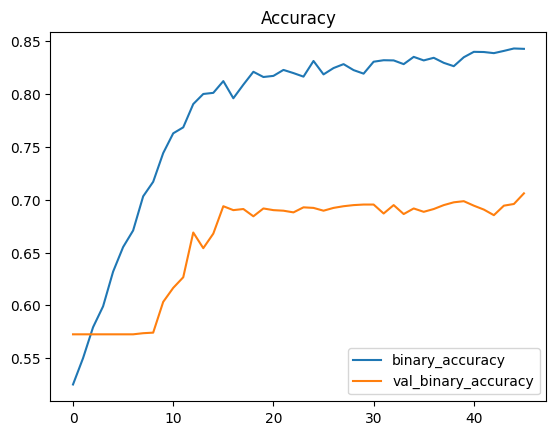

In [8]:
from tensorflow import keras
from tensorflow.keras import layers

model = keras.Sequential([
    layers.Dense(4,activation='relu',input_shape = [X_train.shape[1]]),
    layers.BatchNormalization(),
    layers.Dropout(0.3),
    layers.Dense(16,activation='relu'),
    layers.BatchNormalization(),
    layers.Dropout(0.3),
    layers.Dense(4,activation='relu'),
    layers.BatchNormalization(),
    layers.Dropout(0.3),
    layers.Dense(1,activation='sigmoid'),
    
])


model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['binary_accuracy'],
)

early_stopping = keras.callbacks.EarlyStopping(
    patience=30,
    min_delta=0.001,
    restore_best_weights=True,
)

history = model.fit(
    X_train, y_train,
    validation_data=(X_valid, y_valid),
    batch_size=128,
    epochs=1000,
    callbacks=[early_stopping],
)

history_df = pd.DataFrame(history.history)
history_df.loc[:, ['loss', 'val_loss']].plot(title="Cross-entropy")
history_df.loc[:, ['binary_accuracy', 'val_binary_accuracy']].plot(title="Accuracy")

In [9]:
# Preprocess the test set without dropping rows
test_clean = test.copy()

# Preprocess the test data using the same preprocessor
X_test = preprocessor.transform(test_clean)
# Convert to dense format if necessary
X_test_dense = X_test.toarray() if hasattr(X_test, "toarray") else X_test

# Ensure shapes match between training and test
print(f"Training shape: {X_train.shape}, Test shape: {X_test_dense.shape}")

# Make predictions
predictions = model.predict(X_test_dense)

# Convert probabilities to binary predictions
predictions_binary = (predictions > 0.5).astype(int).flatten()

# Prepare the output DataFrame
output = pd.DataFrame({
    'id': test['id'],
    'target': predictions_binary
})

# Save to CSV
output.to_csv('submission.csv', index=False)
print("Predictions saved to submission.csv")


Training shape: (5664, 5813), Test shape: (3263, 5813)
102/102 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
Predictions saved to submission.csv


In [10]:
output.describe()

,id,target
count,3263.000000,3263.000000
mean,5427.152927,0.237818
std,3146.427221,0.425812
min,0.000000,0.000000
25%,2683.000000,0.000000
50%,5500.000000,0.000000
75%,8176.000000,0.000000
max,10875.000000,1.000000
